100%|██████████| 1000000/1000000 [10:44<00:00, 1550.59it/s]


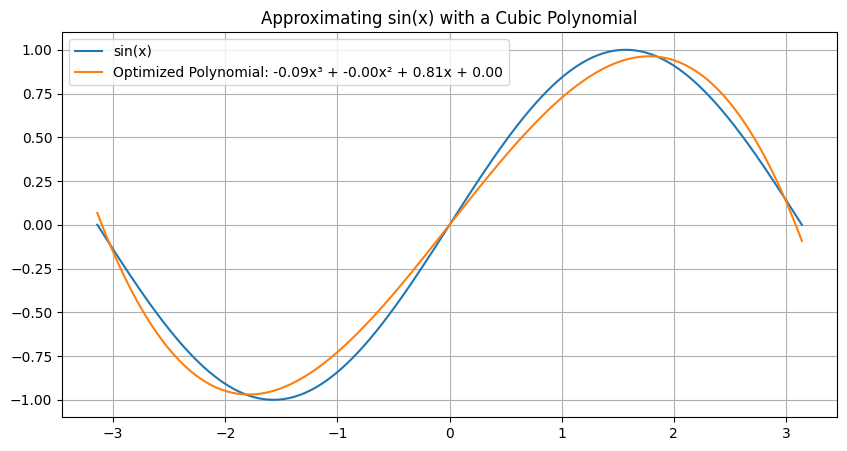

tensor(-0.0857, requires_grad=True) tensor(-0.0015, requires_grad=True) tensor(0.8114, requires_grad=True) tensor(0.0025, requires_grad=True)


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the random seed for reproducibility
torch.manual_seed(0)

# Define the polynomial function
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Prepare data
x = torch.linspace(-np.pi, np.pi, 1000, requires_grad=False)
y_true = torch.sin(x)

# Parameters to be optimized
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

# Optimizer
optimizer = torch.optim.Adam([a, b, c, d], lr=0.01)

# Training loop
for epoch in tqdm(range(100_000_0)):
    optimizer.zero_grad()
    y_pred = f(x, a, b, c, d)
    loss = torch.max(torch.abs(y_true - y_pred))
    loss.backward()
    optimizer.step()
    
    # if epoch % 100 == 0:
        # print(f"Epoch {epoch}: Loss = {loss.item()}")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(x.detach().numpy(), y_true.detach().numpy(), label='sin(x)')
plt.plot(x.detach().numpy(), y_pred.detach().numpy(), label=f'Optimized Polynomial: {a.item():.2f}x³ + {b.item():.2f}x² + {c.item():.2f}x + {d.item():.2f}')
plt.title('Approximating sin(x) with a Cubic Polynomial')
plt.legend()
plt.grid(True)
plt.show()

print(a, b, c, d)


In [12]:
float(a)

-0.08565648645162582